# **Data Science Case Study**

---

---

## **Fligh Price Pridiction Model**

**Instructions**\
- Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his
brother’s wedding and is currently in the process of choosing tickets. Ahmed has to go to
Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait
instead of buy now, simply because ticket prices are just too high.\
- Is this the right decision? Won’t ticket prices increase in the future? Perhaps there is a
sweet-spot Ahmed is hoping to find and maybe he just might find it.\
- This is the problem that you will be tackling in this competition. Can you predict future prices
accurately to such a degree that you can now tell Ahmed - with confidence - that he has made
the wrong decision.\
- Your task boils down to generating optimal predictions for flight prices of multiple airlines. If
successful, your model will contribute greatly to Sastaticket’s rich and diverse set of operating
algorithms.

**Summary**\
1. Find Cheapest and expenses flights at specific time.\
2. You have to go through EDA(Exploratory Data Analysis) Process.\
3. Apply an appropriate Machine Learning Model.\
4. Find a sweet spot for cheap ticket

### 1. **Doing Exploratory Data Analysis**

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading Data_Sets into Data_Frames
df=  pd.read_csv('sastaTicket_train.csv')
df1= pd.read_csv('sastaticket_test.csv')

***Checking Datframe Info.***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   f1          5000 non-null   object 
 2   f2          5000 non-null   object 
 3   f3          5000 non-null   object 
 4   f4          5000 non-null   object 
 5   f5          5000 non-null   object 
 6   f6          5000 non-null   object 
 7   f7          5000 non-null   bool   
 8   f8          5000 non-null   float64
 9   f9          5000 non-null   int64  
 10  f10         5000 non-null   object 
 11  target      5000 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 434.7+ KB


**Renaming The Columns for Ease**

In [4]:
# Renaming Our Columns
df.rename({'f1': 'Buying_Time', 'f2': 'Origin' , 'f3':'Destination', 'f4': 'Depart_Time', 'f5':'Arrival_Time' , 'f6':'Airline',
        'f7': 'Ticket_Refunded', 'f8':'Bag_Weight', 'f9':'Bag_Pieces' , 'f10':'Airline_No.','target':'Fare'}
         , axis=1, inplace=True)
df1.rename({'f1': 'Buying_Time', 'f2': 'Origin' , 'f3':'Destination', 'f4': 'Depart_Time', 'f5':'Arrival_Time' , 'f6':'Airline',
        'f7': 'Ticket_Refunded', 'f8':'Bag_Weight', 'f9':'Bag_Pieces' , 'f10':'Airline_No.'}
         , axis=1, inplace=True)

**Dropping Unnecessary Columns**

In [5]:
df.drop(['Origin','Destination','Airline_No.','Unnamed: 0'],axis=1,inplace=True)                                          
df1.drop(['Origin','Destination','Airline_No.','Unnamed: 0'],axis=1,inplace=True) 

**Type Casting**

In [6]:
df[['Arrival_Time','Depart_Time','Buying_Time']] = df[['Arrival_Time',"Depart_Time",'Buying_Time']].apply(pd.to_datetime)
df1[['Arrival_Time','Depart_Time','Buying_Time']] = df1[['Arrival_Time',"Depart_Time",'Buying_Time']].apply(pd.to_datetime)

**Feature Engineering**

In [7]:
date_format_string= '%Y/%m/%d %.f'


f1= pd.to_datetime(df['Buying_Time'], date_format_string)
f2= pd.to_datetime(df['Depart_Time'], date_format_string)
f3= pd.to_datetime(df['Arrival_Time'], date_format_string)

f11= pd.to_datetime(df1['Buying_Time'], date_format_string)
f22= pd.to_datetime(df1['Depart_Time'], date_format_string)
f33= pd.to_datetime(df1['Arrival_Time'], date_format_string)


    # Feature Engineering
diff = f2-f1
df['Days_to_Depart'] = diff 
df['Days_to_Depart'] = df['Days_to_Depart'].dt.days.values

df['hrs_to_Depart'] = diff 
df['hrs_to_Depart'] = df['hrs_to_Depart'].dt.components['hours']


df['min_to_Depart'] = diff 
df['min_to_Depart'] = df['min_to_Depart'].dt.components['minutes']



    # Feature Engineering
diff1 = f22-f11
df1['Days_to_Depart'] = diff 
df1['Days_to_Depart'] = df1['Days_to_Depart'].dt.days.values

df1['hrs_to_Depart'] = diff 
df1['hrs_to_Depart'] = df1['hrs_to_Depart'].dt.components['hours']


df1['min_to_Depart'] = diff 
df1['min_to_Depart'] = df1['min_to_Depart'].dt.components['minutes']


**Again Dropping unuseful columns**

In [8]:
df.drop(['Buying_Time','Depart_Time','Arrival_Time'],axis=1,inplace=True)      # Again Removing Unnecssary Columns
df1.drop(['Buying_Time','Depart_Time','Arrival_Time','hrs_to_Depart','min_to_Depart'],axis=1,inplace=True)

### 2. **Doing Statistical Analysis**

**Checking Missing Values**

In [10]:
df.isnull().sum()

Airline            0
Ticket_Refunded    0
Bag_Weight         0
Bag_Pieces         0
Fare               0
Days_to_Depart     0
hrs_to_Depart      0
min_to_Depart      0
dtype: int64

In [11]:
df.describe(include='all')

,Airline,Ticket_Refunded,Bag_Weight,Bag_Pieces,Fare,Days_to_Depart,hrs_to_Depart,min_to_Depart
count,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
unique,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,alpha,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,2211,4968,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,22.727400,0.944000,10084.847000,14.971600,11.84600,29.700000
std,NaN,NaN,8.902075,0.606084,3374.189875,18.918498,7.27294,17.462812
min,NaN,NaN,0.000000,0.000000,4990.000000,0.000000,0.00000,0.000000
25%,NaN,NaN,20.000000,1.000000,7796.000000,4.000000,5.00000,14.000000
50%,NaN,NaN,20.000000,1.000000,9150.000000,10.000000,12.00000,30.000000
75%,NaN,NaN,32.000000,1.000000,11245.000000,19.000000,18.00000,45.000000


**Dropping Duplicate Values**

In [ ]:
df.drop_duplicates(keep=False,inplace=True)

#### ***Making list of Categorical Column and Numerical Ones***

In [12]:
cat_cols= ['Airline','Ticket_Refunded','Bag_Weight','Bag_Pieces']
num_cols= ['Days_to_Depart','hrs_to_Depart','min_to_Depart']

### 3. ***PLOTTING***

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

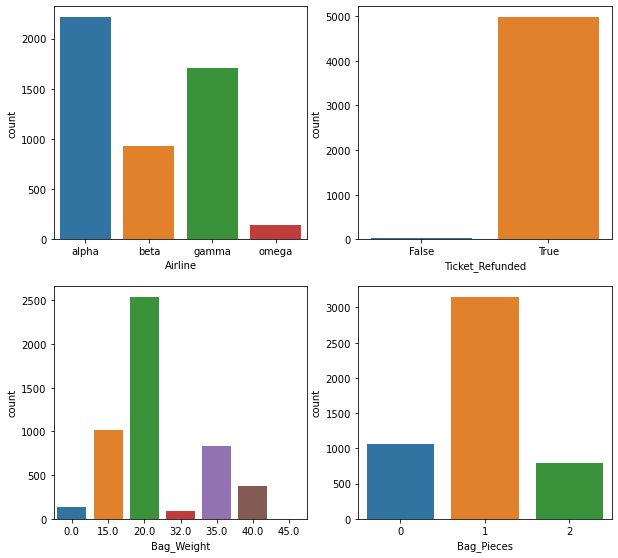

In [13]:
plt.figure (figsize=(10,30))                        # Categorical Count Plotting
c=1
for i in cat_cols:
    plt.subplot(6,2,c)
    sns.countplot(df[i])                
    c=c+1
plt.show()


Results:\
    1. **Alpha** has higher number of flights\
    2. Mostly Tickets are Refund-able\
    3. Most Passengers have 2 piece of Bag and the avg weight is 20.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

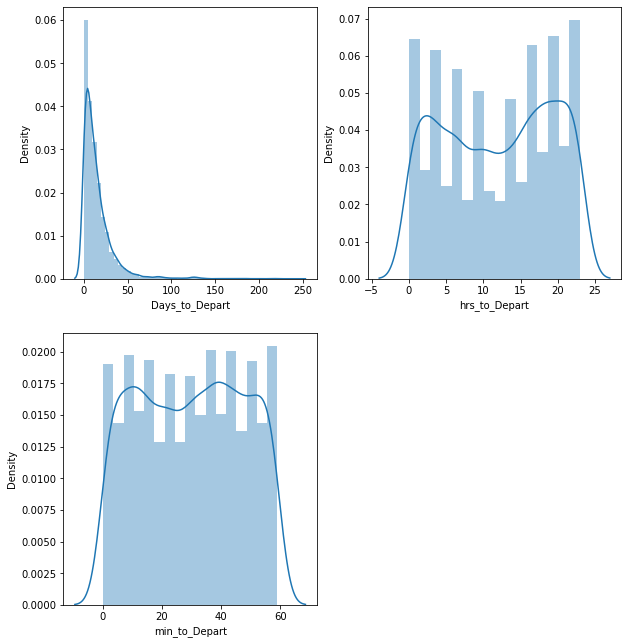

In [14]:
plt.figure (figsize=(10,35))                        # Numerical Count Plotting
c=1
for i in num_cols:
    plt.subplot(6,2,c)
    sns.distplot(df[i])                
    c=c+1
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

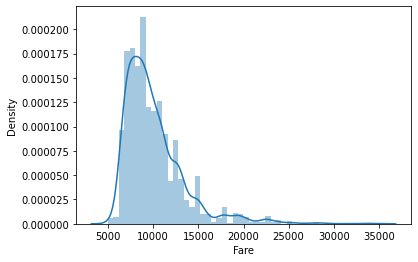

In [15]:
sns.distplot(df['Fare'])

Result: *Looks Left Skewed.*

### 4 **Normalization Test**

In [17]:
# Importing Library
from scipy.stats import shapiro

stat, p = shapiro(df['Fare'])

print ("stat = %.3f , p-value=%.3f" %(stat,p))

if p > 0.05:
    print('H1: Probably Gaussian or Normal distribution')
else:
    print('H0: Probably NO Gaussian or Normal distribution')

stat = 0.823 , p-value=0.000
H0: Probably NO Gaussian or Normal distribution


**Normalizing The Data**

In [18]:
df['Fare']=np.log(df['Fare'])

# df['Days_to_Depart'] = (df['Days_to_Depart']-df['Days_to_Depart'].mean()) / df['Days_to_Depart'].std()
# df['hrs_to_Depart']=    (df['hrs_to_Depart']-df['hrs_to_Depart'].mean()) / df['hrs_to_Depart'].std()
# df['Bag_Weight']=   (df['Bag_Weight']-df['Bag_Weight'].mean()) / df['Bag_Weight'].std()
# df['Fare'] = (df['Fare']-df['Fare'].mean()) / df['Fare'].std()
# df['min_to_Depart']= (df['min_to_Depart']-df['min_to_Depart'].mean()) / df['min_to_Depart'].std()
df.head(5)

,Airline,Ticket_Refunded,Bag_Weight,Bag_Pieces,Fare,Days_to_Depart,hrs_to_Depart,min_to_Depart
0,alpha,True,35.0,1,9.591854,8,1,7
1,alpha,True,35.0,1,9.180603,11,20,48
2,beta,True,20.0,0,8.814925,17,21,7
3,gamma,True,20.0,1,9.354008,21,5,53
4,gamma,True,32.0,1,9.175231,1,1,21


#### ***Checking Outliers and removing them on percentage basis***

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days_to_Depart'>

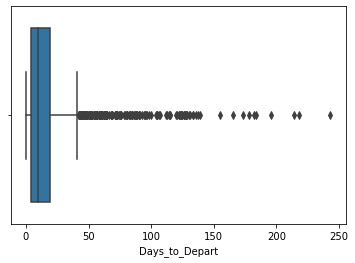

In [19]:
sns.boxplot(df['Days_to_Depart'])

In [20]:
df = df[df['Days_to_Depart'] < 60]              # Removing Days to depart a Flight as there less numbers that buy tickets way before the flight Depart

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days_to_Depart'>

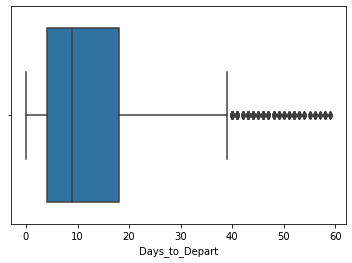

In [21]:
sns.boxplot(df['Days_to_Depart'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

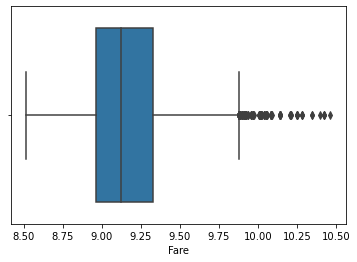

In [22]:
sns.boxplot(df['Fare'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bag_Weight'>

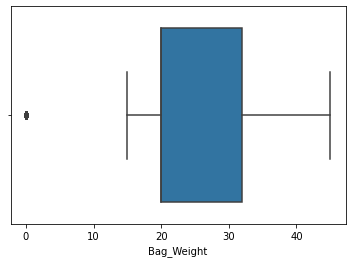

In [23]:
sns.boxplot(df['Bag_Weight'])

*Since Data isn't normal we can check the coorelation as well.*

In [24]:
corr= df.corr(method='pearson')   # Correlation range from 1 to -1
corr.style.background_gradient(cmap='Accent')

,Ticket_Refunded,Bag_Weight,Bag_Pieces,Fare,Days_to_Depart,hrs_to_Depart,min_to_Depart
Ticket_Refunded,1.000000,-0.009616,0.126804,0.008094,0.001365,0.007362,0.004974
Bag_Weight,-0.009616,1.000000,-0.158285,0.205553,-0.012681,0.013273,0.009008
Bag_Pieces,0.126804,-0.158285,1.000000,0.171368,0.000316,-0.042212,0.002214
Fare,0.008094,0.205553,0.171368,1.000000,-0.201491,-0.021389,-0.006780
Days_to_Depart,0.001365,-0.012681,0.000316,-0.201491,1.000000,-0.001059,0.010660
hrs_to_Depart,0.007362,0.013273,-0.042212,-0.021389,-0.001059,1.000000,0.001985
min_to_Depart,0.004974,0.009008,0.002214,-0.006780,0.010660,0.001985,1.000000


**Result:** *Fare has slight Corelation between Bag_weight,Pieces,Days_to_Depart.* 

<AxesSubplot:xlabel='Airline', ylabel='Fare'>

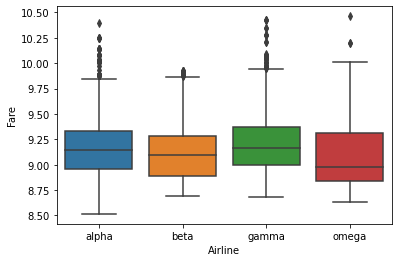

In [25]:
sns.boxplot(data=df , x="Airline",y='Fare')

*Omega Has relatively Low Fare from Other Airlines but on the other hand they have low no. of flights*

In [26]:
df['Airline'].value_counts()

alpha    2150
gamma    1665
beta      904
omega     143
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Days_to_Depart'>

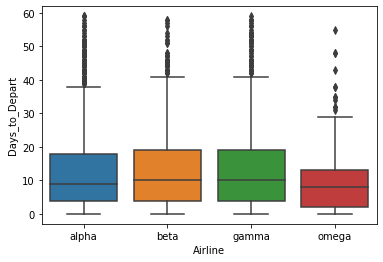

In [27]:
sns.boxplot(data=df,x='Airline',y='Days_to_Depart')

*Less Days for Omega flight to Departure.*

### 5. **Applying Machine_Learning Models**

#### ***Encoding***

In [28]:
from sklearn.preprocessing import LabelEncoder  as le      # Importing Encoder

In [29]:
df['Airline'] = le().fit_transform(df['Airline'])
df['Ticket_Refunded'] = le().fit_transform(df['Ticket_Refunded'])

df1['Airline'] = le().fit_transform(df1['Airline'])
df1['Ticket_Refunded'] = le().fit_transform(df1['Ticket_Refunded'])

C:\Users\DELL\AppData\Local\Temp/ipykernel_9348/3008734118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airline'] = le().fit_transform(df['Airline'])
C:\Users\DELL\AppData\Local\Temp/ipykernel_9348/3008734118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ticket_Refunded'] = le().fit_transform(df['Ticket_Refunded'])


#### ***Splittin into X and Y***

In [35]:
X= df[['Airline','Ticket_Refunded','Bag_Weight','Bag_Pieces','Days_to_Depart']]
y= df['Fare']

In [43]:
X.shape

(4862, 5)

In [46]:
# Making df1 Data_Frame equal ot our test data_frame
df1 = df1.sample(4862)

### ***Machine Learning Modeling***

In [38]:
# Importing Models
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error



lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr =  SVR()


For Root Mean Square Error Calculation: `rms= mean_squared_error(y_test,y_pred, squared=False)`

#### ***Model Looping on basis of scores*** 

In [49]:
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2, random_state=42)               # Random sample of 42 from dataset


for i in [lr,dt,knn,svr]:                           # Reading all Models
        i.fit(X_train,y_train)                      # Fitting the Models
        pred = i.predict(X_test)                    # Predicting the values
        test_score = r2_score(y_test, pred)         # test score
        train_score =  r2_score(y_train, i.predict(X_train))        # train score
        if abs(train_score-test_score) <= 0.1:
            print(i)
            print('R2 Score: ', r2_score(y_test,pred))
            print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
            print('Mean Squared Error: ', mean_squared_error(y_test,pred))
            print('Root Mean Square Error: ', mean_squared_error(y_test,pred, squared=False))



LinearRegression()
R2 Score:  0.10547921095416168
Mean Absolute Error:  0.2122923677014548
Mean Squared Error:  0.07176990758010106
Root Mean Square Error:  0.267899062297913
DecisionTreeRegressor()
R2 Score:  0.15930249220685377
Mean Absolute Error:  0.20035778289079834
Mean Squared Error:  0.06745151501900257
Root Mean Square Error:  0.25971429498393533
KNeighborsRegressor()
R2 Score:  0.0945102126138806
Mean Absolute Error:  0.20788484597682222
Mean Squared Error:  0.07264998103034248
Root Mean Square Error:  0.2695366042494831
SVR()
R2 Score:  0.1512109899683831
Mean Absolute Error:  0.20027447017020497
Mean Squared Error:  0.0681007188999528
Root Mean Square Error:  0.26096114442566504


#### ***Final prediciton on given values for Linear Regression***

In [54]:
lr = LinearRegression().fit(X,y)                    # Fitting Original X and y
pred = lr.predict(df1)

# To save the predicted model
res = pd.DataFrame(pred)
res.index = X.index        # it's important for comparison
res.columns = ['Prediction']
res.to_csv('Prediction_results.csv')

In [59]:
df3 = pd.read_csv('Prediction_results.csv')         # Reading Predicted File
df3.head()

,Unnamed: 0,Prediction
0,0,9.216961
1,1,9.231523
2,2,9.235742
3,3,9.274688
4,4,9.226712


In [61]:
df3['Prediction']=np.exp(df3['Prediction'])         # Converting to Original Values


In [62]:
df3.head()

,Unnamed: 0,Prediction
0,0,10066.427445
1,1,10214.085345
2,2,10257.273918
3,3,10664.632967
4,4,10165.067578


In [64]:
df3.to_csv('Without_log_pred.csv')          # Original Values CSV

---

# **The End**